In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import encoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import joblib

In [107]:

# Load the dataset
data = pd.read_csv("student_data.csv")

In [108]:
data.shape

(193, 4)

In [109]:
data.head()

,Unnamed: 0,gpa,study_hours,promote
0,0,4.00,10,0
1,1,3.80,25,1
2,2,3.93,45,1
3,3,3.40,10,0
4,4,3.20,4,0


In [110]:
studentData = data.drop(columns=['Unnamed: 0'])

In [111]:
studentData.shape

(193, 3)

In [112]:
studentData.head()

,gpa,study_hours,promote
0,4.00,10,0
1,3.80,25,1
2,3.93,45,1
3,3.40,10,0
4,3.20,4,0


In [113]:
x=studentData.drop(columns=['promote'])
y=studentData['promote']

In [114]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [116]:
y_train

82     1
109    1
163    1
35     1
136    1
      ..
106    0
14     0
92     0
179    1
102    1
Name: promote, Length: 154, dtype: int64

In [119]:
y_pred = model.predict(x_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_abs_err)

mean_sq_err = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error: ", mean_sq_err)

r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)
print(model.score(x_test, y_test)*100)

Mean Absolute Error:  0.2513959007672679
Mean Squared Error:  0.09172016172362467
R2 Score:  0.5872592722436889
58.72592722436889


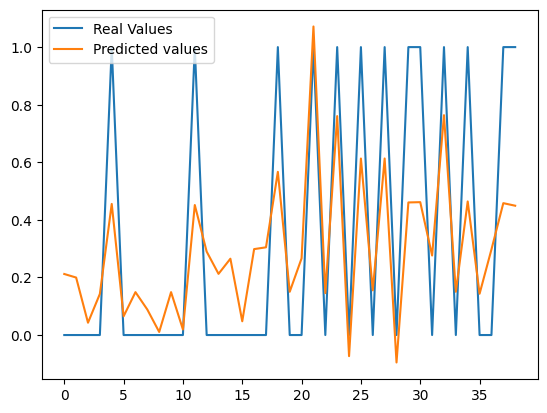

In [118]:
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label="Real Values")
plt.plot(y_pred, label="Predicted values")
plt.legend()
plt.show()